# **Chart 1**

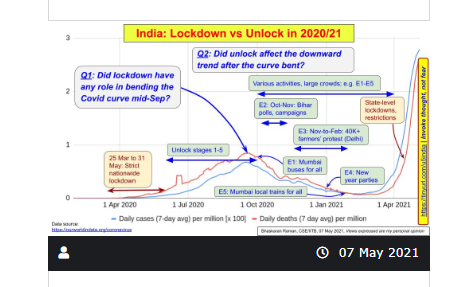

<ipython-input-18-b17233036206>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['date'] = pd.to_datetime(india_data['date'])


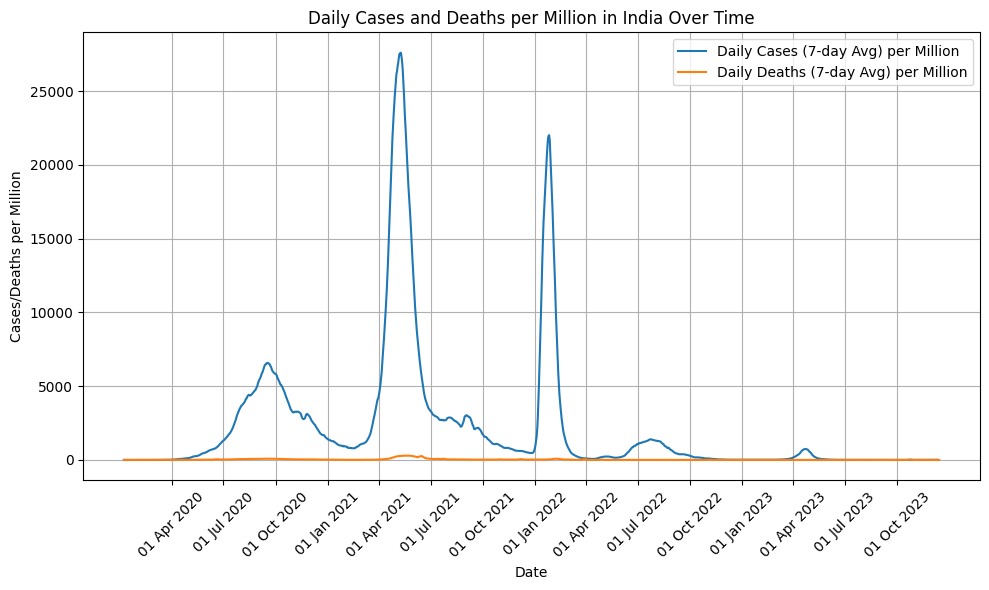

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('owid-covid-data.csv')

# Filter data for the 'India' location
india_data = df[df['location'] == 'India']

# Extract relevant columns from the DataFrame
india_data['date'] = pd.to_datetime(india_data['date'])

# Extract values for plotting
cases_per_million = india_data['new_cases_smoothed_per_million'] * 100  # Adjusted as per your requirement
deaths_per_million = india_data['new_deaths_smoothed_per_million'] * 100  # Adjusted as per your requirement

# Plotting the data with lines
plt.figure(figsize=(10, 6))
plt.plot(india_data['date'], cases_per_million, label='Daily Cases (7-day Avg) per Million', linestyle='-')
plt.plot(india_data['date'], deaths_per_million, label='Daily Deaths (7-day Avg) per Million', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Cases/Deaths per Million')
plt.title('Daily Cases and Deaths per Million in India Over Time')
plt.legend()
plt.grid(True)

# Customize x-axis ticks for the 1st of every 3rd month
first_of_third_month_ticks = india_data['date'][india_data['date'].dt.is_month_start & (india_data['date'].dt.month % 3 == 1)]
plt.xticks(first_of_third_month_ticks, [date.strftime('%d %b %Y') for date in first_of_third_month_ticks], rotation=45)

plt.tight_layout()  # Adjust layout for better display
plt.show()


# **Chart 2**

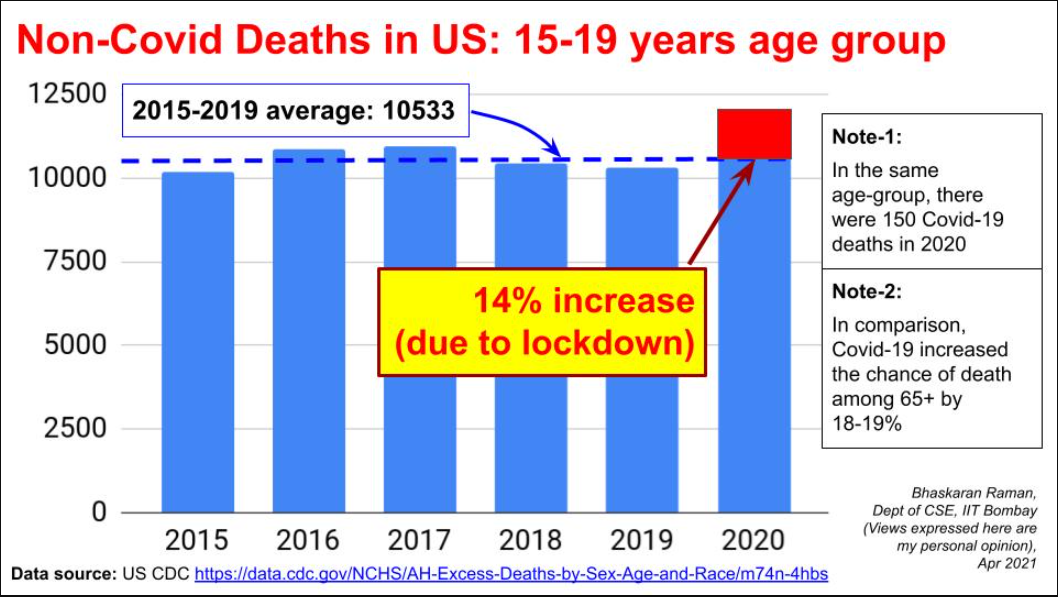

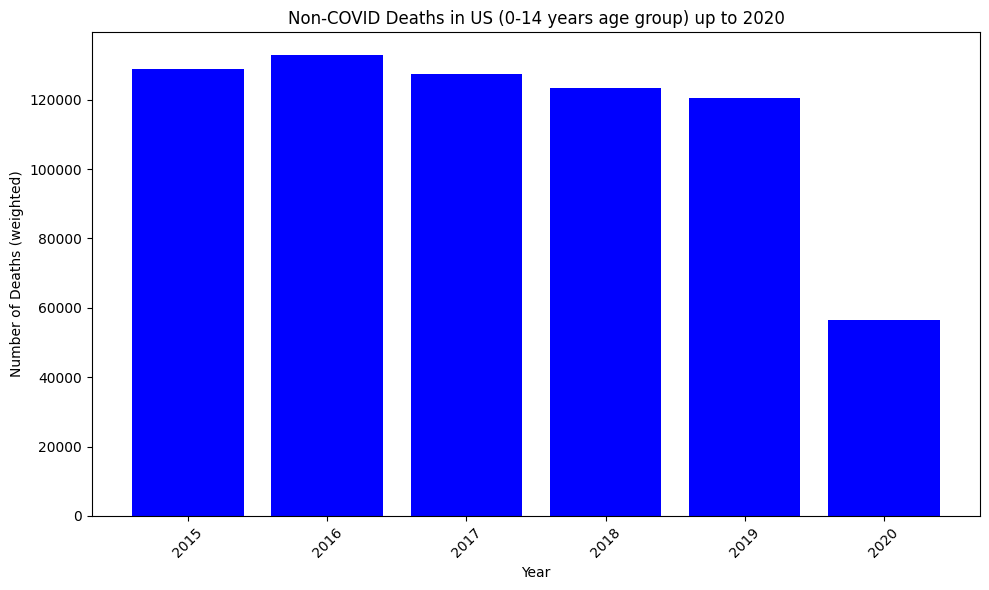

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('AH_Excess_Deaths_by_Sex__Age__and_Race_and_Hispanic_Origin.csv')

# Convert 'Weekending' to datetime format
df['Weekending'] = pd.to_datetime(df['Weekending'])

# Filter data for 0-14 years age group, non-COVID deaths, and up to the year 2020
filtered_data = df[(df['AgeGroup'] == '0-14 Years') &
                   (df['COVID19 (weighted)'] == 0) &
                   (df['Weekending'].dt.year <= 2020)]

# Group data by year and sum the Deaths (weighted) for each year
grouped_data = filtered_data.groupby(filtered_data['Weekending'].dt.year)['Deaths (weighted)'].sum().reset_index()

# Plotting a single bar for each year
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Weekending'], grouped_data['Deaths (weighted)'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Deaths (weighted)')
plt.title('Non-COVID Deaths in US (0-14 years age group) up to 2020')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# **Chart 3**

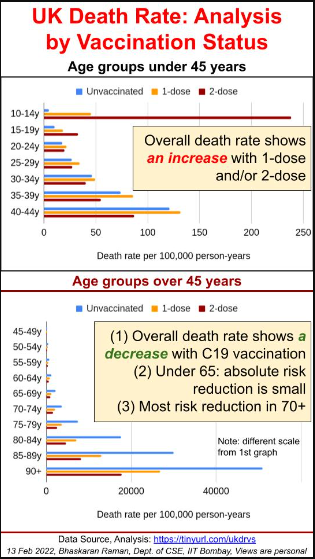

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


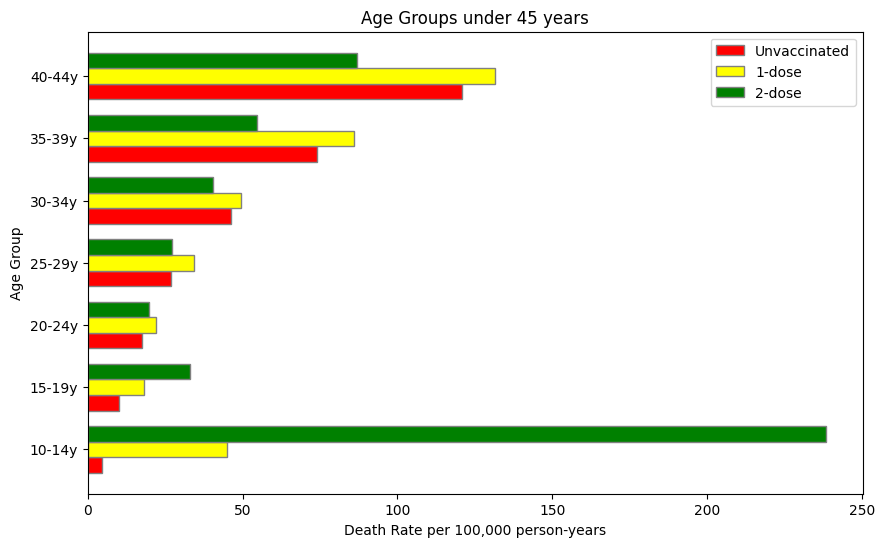

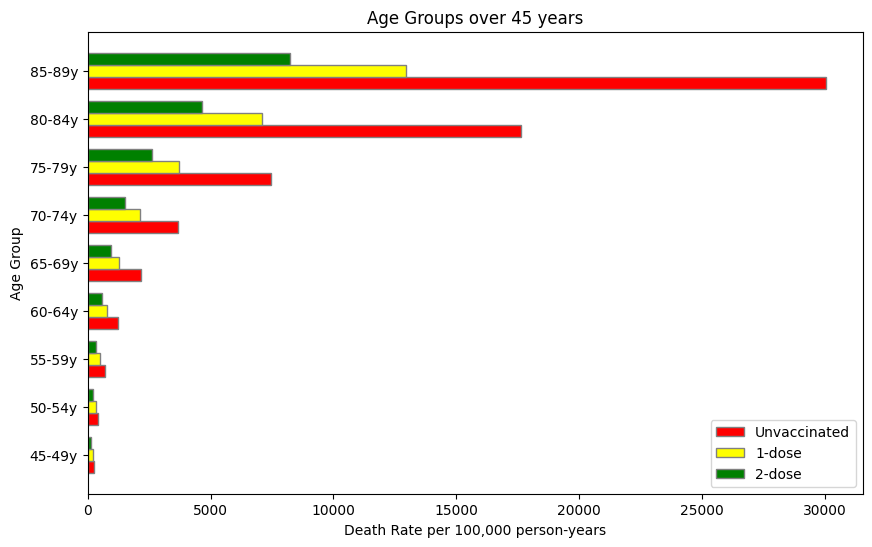

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('UK Death Rate by Vaccination Status - uk-death-rate-by-status.csv')

# Extract data from DataFrame
age_groups = df['Age-group']
unvaccinated = df['Unvaccinated']
one_dose = df['1-dose']
two_dose = df['2-dose']

# Extract numerical values from age ranges and calculate average
df['Age-numerical'] = df['Age-group'].apply(lambda x: np.mean([int(num) for num in x.split('-') if num.isdigit()]))

# Identify indices for age groups less than 45 and greater than or equal to 45
indices_less_than_45 = df[df['Age-numerical'] < 45].index
indices_greater_than_or_equal_45 = df[df['Age-numerical'] >= 45].index

# Set the height of the bars
bar_height = 0.25

# Plotting for ages less than 45
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.barh(indices_less_than_45, unvaccinated[indices_less_than_45], color='red', height=bar_height, edgecolor='grey', label='Unvaccinated')
ax1.barh(indices_less_than_45 + bar_height, one_dose[indices_less_than_45], color='yellow', height=bar_height, edgecolor='grey', label='1-dose')
ax1.barh(indices_less_than_45 + 2*bar_height, two_dose[indices_less_than_45], color='green', height=bar_height, edgecolor='grey', label='2-dose')

# Customize the chart for ages less than 45
ax1.set_yticks(indices_less_than_45 + bar_height)
ax1.set_yticklabels(age_groups[indices_less_than_45])
ax1.set_xlabel('Death Rate per 100,000 person-years')
ax1.set_ylabel('Age Group')
ax1.set_title('Age Groups under 45 years')
ax1.legend()

# Plotting for ages greater than or equal to 45
fig, ax2 = plt.subplots(figsize=(10, 6))

ax2.barh(indices_greater_than_or_equal_45, unvaccinated[indices_greater_than_or_equal_45], color='red', height=bar_height, edgecolor='grey', label='Unvaccinated')
ax2.barh(indices_greater_than_or_equal_45 + bar_height, one_dose[indices_greater_than_or_equal_45], color='yellow', height=bar_height, edgecolor='grey', label='1-dose')
ax2.barh(indices_greater_than_or_equal_45 + 2*bar_height, two_dose[indices_greater_than_or_equal_45], color='green', height=bar_height, edgecolor='grey', label='2-dose')

# Customize the chart for ages greater than or equal to 45
ax2.set_yticks(indices_greater_than_or_equal_45 + bar_height)
ax2.set_yticklabels(age_groups[indices_greater_than_or_equal_45])
ax2.set_xlabel('Death Rate per 100,000 person-years')
ax2.set_ylabel('Age Group')
ax2.set_title('Age Groups over 45 years')
ax2.legend()

# Show the plots
plt.show()
